# **Descripcion caso de estudio y varibles**

0. se caragan las librerias de trabajo


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#la librerias para clusteriacion
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

1. se procede con la carga de la base de datos y la seleccion de variables de trabajo

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

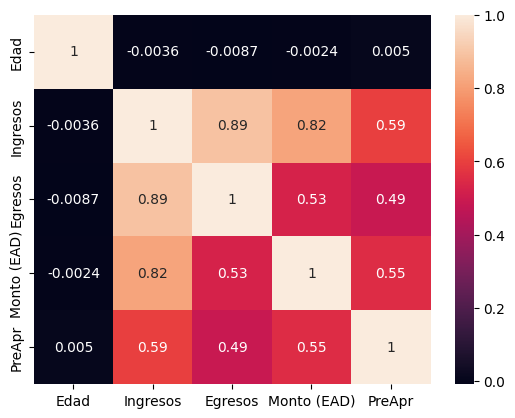

<Figure size 640x480 with 0 Axes>

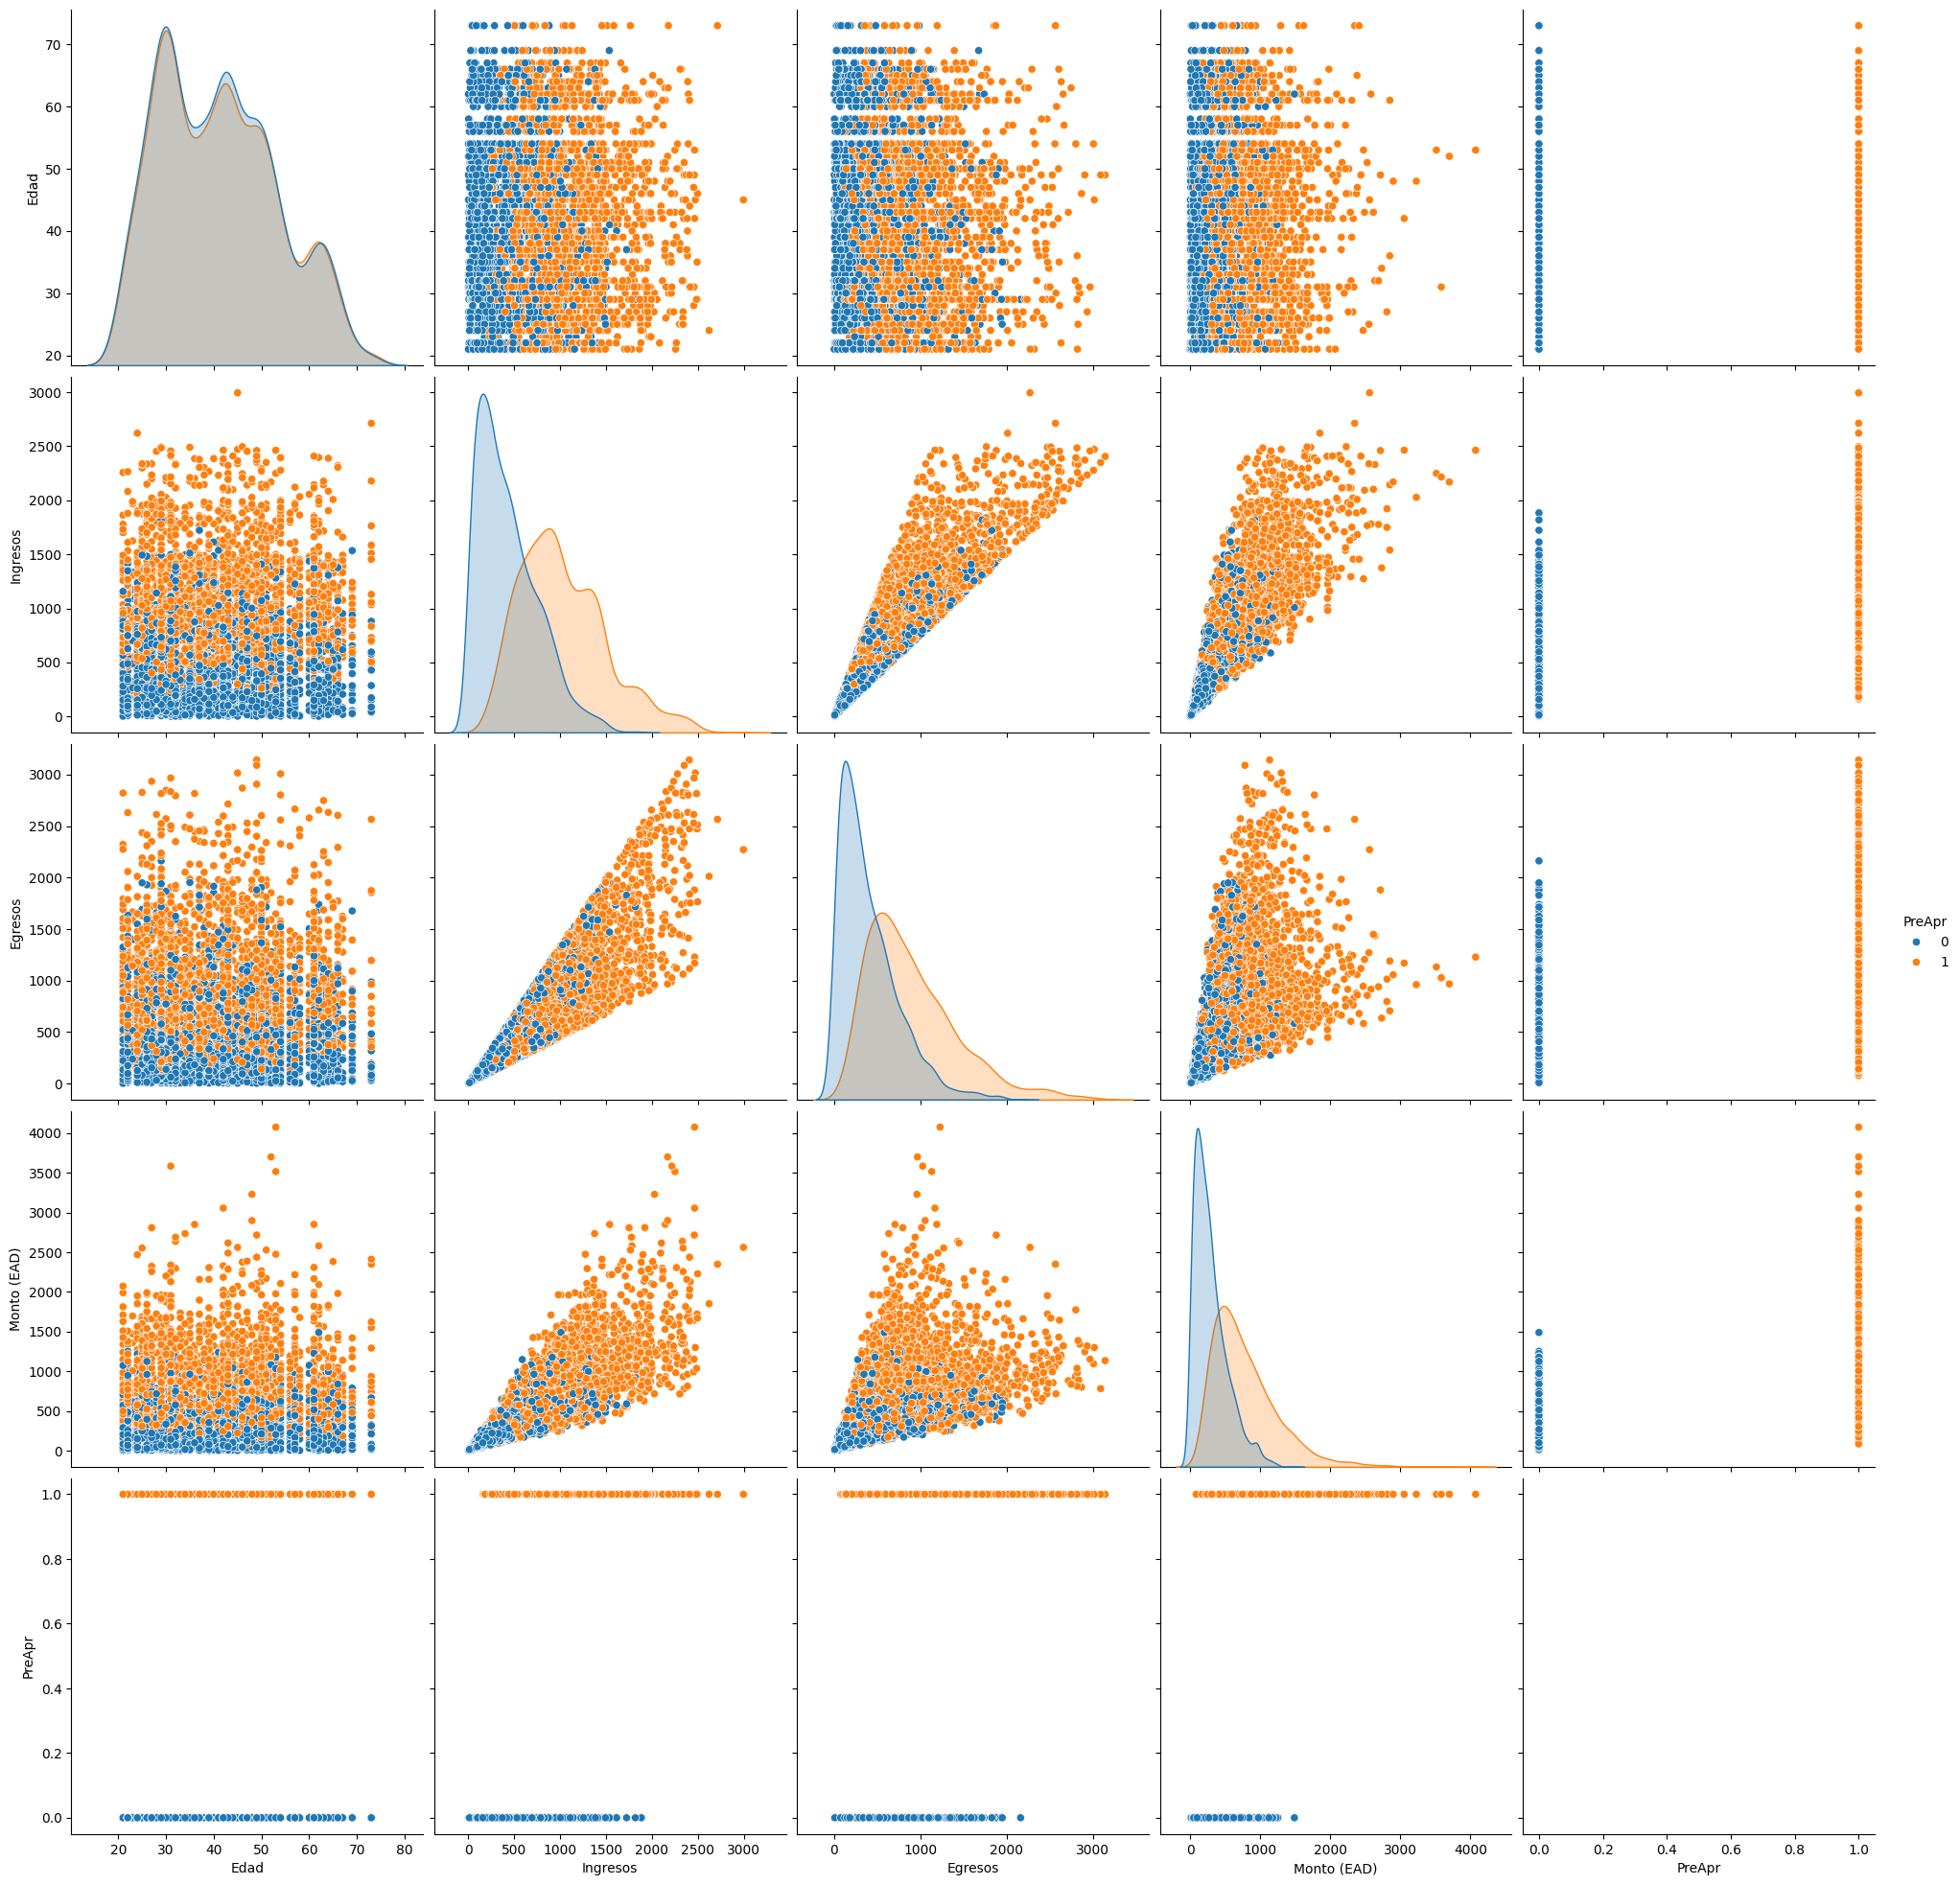

In [ ]:
nxl='/6. SolicitantesCrédito(USD).xlsx'
XBD=pd.read_excel(nxl,sheet_name=1) #Basa AAA

#Seleccionamos las variables de trabajo
XBD=XBD[['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)', 'PreApr']]
XBD=XBD.dropna()
XBD.head()

# Mapa de correlacion
import seaborn as sns
sns.heatmap(XBD.corr(),annot=True)


plt.figure()
sns.pairplot(XBD,hue='PreApr', size=4, vars=['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)', 'PreApr'])
plt.show

* Ias variable que tienen muy buena correlacion Ingresos y egresos, si yo tengo muy buenos ingresos yo voy a gastar mas
* si tienen forma de cono tienen muy buena correlacion
* si yo tengo muchos ingresos el monto que voy a tener sera alto
* calidad del modelo para prenegar o preaprobar, cuando las puntas se separan es porque esa variable pronostica bien
* egresos con monto tambien buena correlacion
* egresos con ingresos muy bien
* sin embargo la grafica no separa tambien los picos
correlacion positiva  cuando aumenta una variable aumenta tambien la otra
* Puntos azules son negados y narangas aprobados
edad variable muy mala para hacer preapo


2. se implementa el modelo de clustering (K-MEANS)

Hacemos 5 grupitos de datos sobre los ingresos

Edad, Ingresos, Egresos, Monto (EAD) 

[[  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]
 [  41.07228916  236.55192554  207.18873039  170.96460534]]


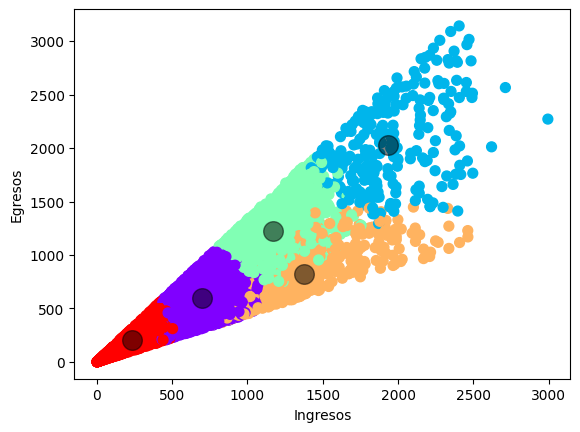

In [ ]:
np.random.seed(42) #esta funcion hace que no trabaje con valores aleatorios si no que a todoso nos de el mismo resultado, en otras palabras àra generara las mismas semillas
K=5 #le indico el numero de clusters o grupo de datos -  esos grupos de datos tiene caracteristicas similares
XD=np.array(XBD [['Edad', 'Ingresos', 'Egresos', 'Monto (EAD)']])#Variables de entrada
yd=np.array(XBD ['PreApr'])# Variables de salida

mkm=KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD , yd) #ajustar el modelo a 5 grupos de datos
centroids=mkm.cluster_centers_
ydc=mkm.labels_ #cuantas personas quedaron en cada cluster
print("Edad, Ingresos, Egresos, Monto (EAD) \n")
print(centroids)

plt.figure()
plt.scatter(XD[:,1], XD[:,2], c=ydc,s=50, cmap='rainbow')#s= al tamaño de las bolitas de los cluster y alpha= la transparecia de la figura
plt.scatter(centroids[:,1], centroids[:,2], c='black',s=200, alpha=0.5)
plt.xlabel('Ingresos')
plt.ylabel('Egresos')
plt.show()

#para colocar el numero del centroide
#for i,c in enumerate(centroids):
 # plt.text(c[1], c[2], str(i),fontsize=12, color='black')
plt.show()

3. cuantos aprobados y negados hay por cluster?

In [ ]:
ND=np.bincount(ydc) #control, shif , enter a ND, Cuantos datos hay por cluster
XBD["cluster"]=ydc  # columna adiccional con los clusters de pertenencia
display(XBD)

N_Apr_Neg=XBD.groupby('cluster')['PreApr'].value_counts()
NApr=XBD.groupby('cluster'). agg({"PreApr":lambda x: (x==1).sum()})
NNeg=XBD.groupby('cluster'). agg({"PreApr":lambda x: (x==0).sum()})
print(ND)
print(NApr)
print(NNeg)

,Edad,Ingresos,Egresos,Monto (EAD),PreApr,cluster
0,38,1356.14400,1685.622667,625.562230,1,2
1,51,286.01600,364.462000,140.031984,1,4
2,37,517.46325,629.208889,284.564492,0,0
3,29,473.27000,551.616889,309.647588,1,0
4,42,750.09175,806.715778,500.663578,1,0
...,...,...,...,...,...,...
5837,48,1207.84800,753.801111,748.041791,1,2
5838,31,1472.77200,953.812889,870.793819,1,2
5839,38,773.01975,672.910667,594.947894,1,0
5840,43,635.50175,780.691556,305.580539,1,0


[2039  272  971  485 2075]
         PreApr
cluster        
0          1136
1           261
2           745
3           472
4           269
         PreApr
cluster        
0           903
1            11
2           226
3            13
4          1806


4. Se procede a evaluar el modelo

In [ ]:
ydp=np.zeros((len(XD),1))#TOTAL DATOS
NApr=np.array(NApr);NNeg=np.array(NNeg)#aqui convierto los vectores en arrays
print("La decima persona pertenece al cluster",ydc[9])
print(" quien es la persona",XD[9])
print("el numero de personas aprobadas en este cluster es", NApr[4,])
print("el numero de personas negadas en este cluster es", NNeg[4,])

if NApr[4,]>NNeg[4,]:
  print("El credito es aprobado")
else:
  print("El credito es negado")

  for k in range(len(XD)):
    print("La persona",k)
    print("pertenece al cluster",ydc[k])
    #para aprobar o negar
    nc=ydc[k]#cluster al que pertene

    if NApr[nc,]>NNeg[nc,]:
      print("El credito es aprobado")
    else:
      print("El credito es negado")


La decima persona pertenece al cluster 4
 quien es la persona [ 25.         285.3135     203.33933333 199.60047614]
el numero de personas aprobadas en este cluster es [269]
el numero de personas negadas en este cluster es [1806]
El credito es negado
La persona 0
pertenece al cluster 2
El credito es aprobado
La persona 1
pertenece al cluster 4
El credito es negado
La persona 2
pertenece al cluster 0
El credito es aprobado
La persona 3
pertenece al cluster 0
El credito es aprobado
La persona 4
pertenece al cluster 0
El credito es aprobado
La persona 5
pertenece al cluster 0
El credito es aprobado
La persona 6
pertenece al cluster 4
El credito es negado
La persona 7
pertenece al cluster 0
El credito es aprobado
La persona 8
pertenece al cluster 4
El credito es negado
La persona 9
pertenece al cluster 4
El credito es negado
La persona 10
pertenece al cluster 1
El credito es aprobado
La persona 11
pertenece al cluster 0
El credito es aprobado
La persona 12
pertenece al cluster 0
El credito 

# **  ANALISIS DE RESULTADOS**
* En el mapa de correlacion se puede observar que las variables que tuvieron una mayor correlacion fueron las variables de ingresos y egresos con un valor que estuvo cercano al 85% (89%)
* en este mismo mapa se puede observar que la variable ingresos logro separar de mejor manera los datos frente a la preaprobacion, esto quiere decir los picos de las graficas.
* deacuerdo con los cluster (perfiles de solicitantes) podemos observar que el cluster (1) presentoo los mejores valores para la variables ingreos(1930), egeresos(2026), con montos promedios de 1140UDS
* Se destaca igualmete el cluster 3 el cual posee los segunodos ingresos mas altos dentro de los perfiles de solicitantes credito (1375)USD.
* Podemos decir que el perfil credito (1) me representa los mejpres clientes potenciales